# Integer linear programming experiments for vertex cover problems
TODO Simple description of the project to add.

First of all, import the Python libraries that we will be using for data analysis.

In [5]:
import pandas as pd
import numpy
import pyvis
import matplotlib.pyplot as plt

Then, import the csv file which contains the data extracted for each experiment. The first three rows of the file are displayed in order to show the structure of the file. 

In [24]:
data = pd.read_csv('data.csv')
data.head(3)

,name,time,ticks,sol_nodes,gap,time_lim,nodes,edges,cnnct_cmp,avg_clust,std_dev_clust,radius,diameter
0,gnp_000,0.39,99.51,69.0,0.0,False,100,508,1,0.113342,0.053480,3,4
1,gnp_001,0.45,100.66,68.0,0.0,False,100,484,1,0.097705,0.047745,3,4
2,gnp_002,0.52,138.64,69.0,0.0,False,100,487,1,0.083568,0.043205,3,4


Plot a graph 

<AxesSubplot:xlabel='avg_clust', ylabel='time'>

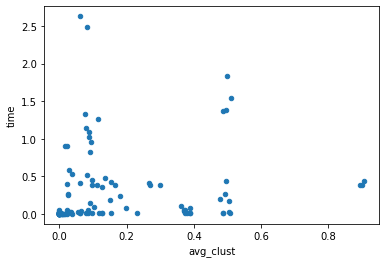

In [37]:
x = data['avg_clust'].sort_values()
y = data['time']
data.loc[data['time'].between(0,3) ].plot(kind='scatter', x='avg_clust', y='time')